# Modelamiento proyecto 3

#### Primero traemos la data ya limpia de duplicados, nulls, outliers y variables que no aportan

In [1]:
import pandas as pd

data_completa = pd.read_csv("datos_limpios.csv")
data_completa.head()

,periodo,cole_area_ubicacion,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20142,RURAL,TECNICO,MIXTO,MANANA,SAN CAYETANO,OFICIAL,F,CUCUTA,SAN CAYETANO,...,No,No,No,A-,36.0,44.0,51.0,37.0,37.0,209.0
1,20194,URBANO,TECNICO/ACADEMICO,MIXTO,TARDE,ABREGO,OFICIAL,M,ABREGO,ABREGO,...,No,No,Si,A-,42.0,41.0,39.0,40.0,54.0,217.0
2,20152,RURAL,ACADEMICO,MIXTO,COMPLETA,PAMPLONITA,OFICIAL,M,PAMPLONA,PAMPLONITA,...,No,No,No,A-,38.0,62.0,45.0,57.0,48.0,259.0
3,20142,URBANO,TECNICO,MIXTO,COMPLETA,MUTISCUA,OFICIAL,F,PAMPLONA,MUTISCUA,...,No,No,Si,A1,58.0,58.0,56.0,60.0,58.0,290.0
4,20152,URBANO,TECNICO/ACADEMICO,MIXTO,MANANA,CUCUTA,OFICIAL,M,CUCUTA,CUCUTA,...,No,No,No,A-,41.0,46.0,44.0,46.0,49.0,229.0


In [2]:
data_completa.describe(include='object').transpose()

,count,unique,top,freq
cole_area_ubicacion,88622,2,URBANO,81243
cole_caracter,88622,4,TECNICO/ACADEMICO,48900
cole_genero,88622,3,MIXTO,82755
cole_jornada,88622,6,MANANA,49278
cole_mcpio_ubicacion,88622,39,CUCUTA,49672
cole_naturaleza,88622,2,OFICIAL,65877
estu_genero,88622,2,F,48969
estu_mcpio_presentacion,88622,14,CUCUTA,53692
estu_mcpio_reside,88622,40,CUCUTA,49474
fami_cuartoshogar,88622,6,3,33936


#### Generamos nuestras variables dummies, para poder trabajar estos variables categoricas:

In [3]:
data_encoded = pd.get_dummies(data_completa, columns=['cole_area_ubicacion', 'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 
                                                      'cole_naturaleza', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
                                                      'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 
                                                      'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 
                                                      'fami_tienelavadora', 'desemp_ingles'], drop_first=True)
data_encoded = data_encoded.astype(int)
data_encoded

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,cole_area_ubicacion_URBANO,cole_caracter_NO APLICA,cole_caracter_TECNICO,...,fami_personashogar_7 a 8,fami_personashogar_9 o mas,fami_tieneautomovil_Si,fami_tienecomputador_Si,fami_tieneinternet_Si,fami_tienelavadora_Si,desemp_ingles_A1,desemp_ingles_A2,desemp_ingles_B+,desemp_ingles_B1
0,20142,36,44,51,37,37,209,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,20194,42,41,39,40,54,217,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,20152,38,62,45,57,48,259,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20142,58,58,56,60,58,290,1,0,1,...,0,0,1,0,0,1,1,0,0,0
4,20152,41,46,44,46,49,229,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88617,20194,45,43,44,42,47,220,1,0,0,...,0,0,0,0,0,1,0,0,0,0
88618,20152,60,77,68,77,62,351,1,0,0,...,0,0,1,1,1,1,0,1,0,0
88619,20152,58,52,53,45,44,246,1,0,0,...,0,0,1,1,1,1,1,0,0,0
88620,20194,82,82,71,69,71,370,1,0,0,...,1,0,0,1,1,1,0,0,1,0


#### Generamos nuestro set de X y Y, sacamos las otras variables de salida que no usaremos para este modelo y tambien sacamos la variable de entrada periodo al ser una variable de tiempo

In [4]:
data_x = data_encoded.drop(['periodo', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
                            'punt_global'], axis=1)
#data_y = data_encoded['punt_global']
data_y = (data_encoded['punt_global'] >= 250).astype(int)

print(data_x.shape)
print(data_y.shape)
data_y

(88622, 148)
(88622,)


0        0
1        0
2        1
3        1
4        0
        ..
88617    0
88618    1
88619    0
88620    1
88621    1
Name: punt_global, Length: 88622, dtype: int32

#### Revisamos que las categorias esten balanceadas

In [5]:
count_ones = (data_y == 1).sum()
proporcion = count_ones / data_y.count()
proporcion

0.5442779445284467

#### Generamos nuestro set de train, validation y test

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42) #Dividir el conjunto de datos en entrenamiento y valaidacion, 80% entrenamiento, 20% validacion

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42) #Dividir el conjunto en  entrenamiento

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(56717, 148)
(14180, 148)
(17725, 148)


#### Creamos un parser donde guardamos los hiperparametros con los que vamos a configurar nuestros distintos modelos

In [7]:
# Usaremos argparse para pasarle argumentos a las funciones de entrenamiento
import argparse

parser = argparse.ArgumentParser(description='Entrenamiento de una red feed-forward para el problema de clasificación con datos MNIST en TensorFlow/Keras')
parser.add_argument('--batch_size', '-b', type=int, default=32)
parser.add_argument('--epochs', '-e', type=int, default=40)
parser.add_argument('--learning_rate', '-l', type=float, default=0.001)
parser.add_argument('--num_hidden_units', '-n', type=int, default=128)
parser.add_argument('--num_hidden_layers', '-N', type=int, default=2)
parser.add_argument('--regularizers', '-r', type=float, default=0.01)
parser.add_argument('--dropout', '-d', type=float, default=0.20)
parser.add_argument('--activation', '-a', type=str, default='relu')
parser.add_argument('--same_neurons', '-s', type=int, default=0)
parser.add_argument('--normalization', '-t', type=int, default=0)
args = parser.parse_args([])

#### Generamos una funcion con la cual llamamos un optimizador

In [8]:
import mlflow 
import mlflow.keras
import keras
import tensorflow as tf
import tensorflow.keras as tk
from keras import models
from keras import layers
from keras import regularizers

def get_optimizer():
    """
    :return: Keras optimizer
    """
    optimizer=tf.keras.optimizers.Adam(learning_rate=args.learning_rate)
    return optimizer

### Generamos una funcion la cual corre Mflow, inicializa el modelo y lo corre con base a los parametros de "args"

In [9]:
# Esta función define una corrida del modelo, con entrenamiento y 
# registro en MLflow
def run_mlflow(run_name="proyecto_3_regresion_model"):
    # Iniciamos una corrida de MLflow
    mlflow.start_run(run_name=run_name)
    run = mlflow.active_run()
    # MLflow asigna un ID al experimento y a la corrida
    experimentID = run.info.experiment_id
    runID = run.info.run_uuid
    # reistro automáticos de las métricas de keras
    mlflow.keras.autolog()
    
    if args.activation == 'relu':
        act_func = tf.nn.relu
    elif args.activation == 'tanh':
        act_func = tf.nn.tanh
    elif args.activation == 'prelu':
        act_func = layers.PReLU()

    # definimos la capa de entrada
    input_layer = layers.Input(shape=(148,))  # 148 variables de entrada
    x = input_layer

    neurons = [0] * 4
    # Agregamos capas ocultas a la red
    for n in range(0, args.num_hidden_layers):
        if args.normalization == 0:
            if args.same_neurons == 0:
                neurons[n] = args.num_hidden_units
                # agregamos una capa densa (completamente conectada)
                x = layers.Dense(neurons[n], activation=act_func,kernel_regularizer=regularizers.l2(args.regularizers))(x)
                # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
                # x = layers.Dropout(args.dropout)(x)
                x = layers.BatchNormalization()(x)
            else: 
                neurons[n] = args.num_hidden_units/(2 ** (n - 1))
                # agregamos una capa densa (completamente conectada)
                x = layers.Dense(neurons[n], activation=act_func,kernel_regularizer=regularizers.l2(args.regularizers))(x)
                # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
                # x = layers.Dropout(args.dropout)(x)
                x = layers.BatchNormalization()(x)
        else:
            if args.same_neurons == 0:
                neurons[n] = args.num_hidden_units
                # agregamos una capa densa (completamente conectada)
                x = layers.Dense(neurons[n], activation=act_func)(x)
                # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
                x = layers.Dropout(args.dropout)(x)
                # x = layers.BatchNormalization()(x)
            else: 
                neurons[n] = args.num_hidden_units/(2 ** (n - 1))
                # agregamos una capa densa (completamente conectada)
                x = layers.Dense(neurons[n], activation=act_func)(x)
                # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
                x = layers.Dropout(args.dropout)(x)
                # x = layers.BatchNormalization()(x)

    # capa final con 1 nodo de salida y sin activacion por lo que es de regresion
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    
    # Se arma el modelo:
    model = keras.Model(input_layer, output_layer)
    # https://keras.io/optimizers/
    optimizer = get_optimizer()

    # compilamos el modelo y definimos la función de pérdida  
    # otras funciones de pérdida comunes para problemas de clasificación
    # 1. sparse_categorical_crossentropy
    # 2. binary_crossentropy
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy',keras.metrics.AUC()])

    # entrenamos el modelo
    print("-" * 100)
    model.fit(x_train, y_train, epochs=args.epochs, batch_size=args.batch_size, validation_data=(x_valid, y_valid))

    # evaluamos el modelo
    test_loss, test_acurracy, test_auc = model.evaluate(x_test, y_test, verbose=2)

    # Alistamos algunos parametros
    hidden_layers = args.num_hidden_layers
    activation_funtion = args.activation
    
    # Metemos los parametros en Mlflow
    mlflow.log_param('Capas ocultas', hidden_layers)
    mlflow.log_param('Neuronas', neurons)
    mlflow.log_param('Funcion de activacion', activation_funtion)

    # Metemos las metricas de test en Mlflow
    mlflow.log_metric('test_loss', test_loss)
    mlflow.log_metric('test_acurracy', test_acurracy)
    mlflow.log_metric('test_auc', test_auc)

    mlflow.end_run(status='FINISHED')
    return (experimentID, runID)

#### Hacemos una primer corrida (entrenada) de modelo con las parametros base

In [10]:
args = parser.parse_args(["--batch_size", '256', "--epochs", '30'])

(experimentID, runID) = run_mlflow(run_name="Prueba_modelo_base")
print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
print(tf.__version__)

2024/12/05 20:36:13 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:36:13 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


----------------------------------------------------------------------------------------------------


2024/12/05 20:36:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


Epoch 1/30


222/222 [==============================] - ETA: 0s - loss: 1.6467 - accuracy: 0.7389 - auc: 0.8123

2024/12/05 20:36:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 4ms/step - loss: 1.6467 - accuracy: 0.7389 - auc: 0.8123 - val_loss: 0.9840 - val_accuracy: 0.6317 - val_auc: 0.8345
Epoch 2/30
206/222 [==========================>...] - ETA: 0s - loss: 0.7239 - accuracy: 0.7585 - auc: 0.8364

2024/12/05 20:36:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.7166 - accuracy: 0.7587 - auc: 0.8366 - val_loss: 0.6529 - val_accuracy: 0.7602 - val_auc: 0.8402
Epoch 3/30
209/222 [===========================>..] - ETA: 0s - loss: 0.5739 - accuracy: 0.7623 - auc: 0.8390

2024/12/05 20:36:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.5725 - accuracy: 0.7623 - auc: 0.8389 - val_loss: 0.5427 - val_accuracy: 0.7664 - val_auc: 0.8423
Epoch 4/30
211/222 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7645 - auc: 0.8410

2024/12/05 20:36:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.5274 - accuracy: 0.7645 - auc: 0.8410 - val_loss: 0.5153 - val_accuracy: 0.7657 - val_auc: 0.8441
Epoch 5/30
208/222 [===========================>..] - ETA: 0s - loss: 0.5106 - accuracy: 0.7646 - auc: 0.8411

2024/12/05 20:36:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.5104 - accuracy: 0.7648 - auc: 0.8411 - val_loss: 0.5110 - val_accuracy: 0.7622 - val_auc: 0.8449
Epoch 6/30
206/222 [==========================>...] - ETA: 0s - loss: 0.5019 - accuracy: 0.7664 - auc: 0.8424

2024/12/05 20:36:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.5026 - accuracy: 0.7656 - auc: 0.8418 - val_loss: 0.4985 - val_accuracy: 0.7688 - val_auc: 0.8468
Epoch 7/30
222/222 [==============================] - ETA: 0s - loss: 0.4981 - accuracy: 0.7662 - auc: 0.8423

2024/12/05 20:36:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4981 - accuracy: 0.7662 - auc: 0.8423 - val_loss: 0.4967 - val_accuracy: 0.7638 - val_auc: 0.8449
Epoch 8/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4957 - accuracy: 0.7661 - auc: 0.8424 - val_loss: 0.4977 - val_accuracy: 0.7599 - val_auc: 0.8456
Epoch 9/30
218/222 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.7675 - auc: 0.8426

2024/12/05 20:36:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4941 - accuracy: 0.7675 - auc: 0.8427 - val_loss: 0.4924 - val_accuracy: 0.7697 - val_auc: 0.8460
Epoch 10/30
212/222 [===========================>..] - ETA: 0s - loss: 0.4921 - accuracy: 0.7674 - auc: 0.8433

2024/12/05 20:36:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4923 - accuracy: 0.7672 - auc: 0.8433 - val_loss: 0.4919 - val_accuracy: 0.7681 - val_auc: 0.8457
Epoch 11/30
216/222 [============================>.] - ETA: 0s - loss: 0.4926 - accuracy: 0.7665 - auc: 0.8434

2024/12/05 20:36:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.7663 - auc: 0.8432 - val_loss: 0.4897 - val_accuracy: 0.7690 - val_auc: 0.8478
Epoch 12/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7684 - auc: 0.8444 - val_loss: 0.4968 - val_accuracy: 0.7647 - val_auc: 0.8441
Epoch 13/30
204/222 [==========================>...] - ETA: 0s - loss: 0.4907 - accuracy: 0.7685 - auc: 0.8440

2024/12/05 20:36:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4908 - accuracy: 0.7677 - auc: 0.8439 - val_loss: 0.4883 - val_accuracy: 0.7679 - val_auc: 0.8479
Epoch 14/30
216/222 [============================>.] - ETA: 0s - loss: 0.4892 - accuracy: 0.7674 - auc: 0.8449

2024/12/05 20:36:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4896 - accuracy: 0.7676 - auc: 0.8446 - val_loss: 0.4880 - val_accuracy: 0.7709 - val_auc: 0.8477
Epoch 15/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4890 - accuracy: 0.7668 - auc: 0.8446 - val_loss: 0.4900 - val_accuracy: 0.7693 - val_auc: 0.8481
Epoch 16/30
218/222 [============================>.] - ETA: 0s - loss: 0.4886 - accuracy: 0.7681 - auc: 0.8445

2024/12/05 20:36:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4883 - accuracy: 0.7683 - auc: 0.8447 - val_loss: 0.4867 - val_accuracy: 0.7676 - val_auc: 0.8482
Epoch 17/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4875 - accuracy: 0.7680 - auc: 0.8452 - val_loss: 0.4947 - val_accuracy: 0.7689 - val_auc: 0.8460
Epoch 18/30
214/222 [===========================>..] - ETA: 0s - loss: 0.4874 - accuracy: 0.7683 - auc: 0.8447

2024/12/05 20:36:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4877 - accuracy: 0.7684 - auc: 0.8447 - val_loss: 0.4850 - val_accuracy: 0.7666 - val_auc: 0.8481
Epoch 19/30
215/222 [============================>.] - ETA: 0s - loss: 0.4862 - accuracy: 0.7683 - auc: 0.8458

2024/12/05 20:36:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.7681 - auc: 0.8457 - val_loss: 0.4836 - val_accuracy: 0.7715 - val_auc: 0.8485
Epoch 20/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4861 - accuracy: 0.7684 - auc: 0.8456 - val_loss: 0.4857 - val_accuracy: 0.7704 - val_auc: 0.8486
Epoch 21/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.7680 - auc: 0.8453 - val_loss: 0.4915 - val_accuracy: 0.7703 - val_auc: 0.8488
Epoch 22/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4852 - accuracy: 0.7690 - auc: 0.8463 - val_loss: 0.4853 - val_accuracy: 0.7700 - val_auc: 0.8483
Epoch 23/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4848 - accuracy: 0.7686 - auc: 0.8462 - val_loss: 0.4888 - val_accuracy: 0.7682 - val_auc: 0.8489
Epoch 24/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4851 - accuracy: 0.7677 - auc: 0.8459 - val_loss: 0.4844 - v

2024/12/05 20:36:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4848 - accuracy: 0.7683 - auc: 0.8461 - val_loss: 0.4834 - val_accuracy: 0.7702 - val_auc: 0.8490
Epoch 27/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4849 - accuracy: 0.7690 - auc: 0.8459 - val_loss: 0.4837 - val_accuracy: 0.7695 - val_auc: 0.8482
Epoch 28/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4841 - accuracy: 0.7687 - auc: 0.8466 - val_loss: 0.4862 - val_accuracy: 0.7696 - val_auc: 0.8488
Epoch 29/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7681 - auc: 0.8464 - val_loss: 0.4863 - val_accuracy: 0.7682 - val_auc: 0.8484
Epoch 30/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4844 - accuracy: 0.7690 - auc: 0.8464 - val_loss: 0.4844 - val_accuracy: 0.7697 - val_auc: 0.8477


2024/12/05 20:36:37 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:36:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpdxfm2q55\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpdxfm2q55\model\data\model\assets
2024/12/05 20:36:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:36:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4946 - accuracy: 0.7621 - auc: 0.8400 - 738ms/epoch - 1ms/step
MLflow Run completed with run_id 029d6984eed4468194e0ec388406de1b and experiment_id 0
2.15.0


In [11]:
args = parser.parse_args(["--batch_size", '256', "--epochs", '30', "--normalization", '1'])

(experimentID, runID) = run_mlflow(run_name="Prueba_modelo_base_con_dropout")
print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
print(tf.__version__)

2024/12/05 20:36:49 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:36:49 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


----------------------------------------------------------------------------------------------------


2024/12/05 20:36:49 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


Epoch 1/30
209/222 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7286 - auc_1: 0.8032

2024/12/05 20:36:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 5ms/step - loss: 0.5338 - accuracy: 0.7304 - auc_1: 0.8049 - val_loss: 0.4830 - val_accuracy: 0.7672 - val_auc_1: 0.8449
Epoch 2/30
215/222 [============================>.] - ETA: 0s - loss: 0.4887 - accuracy: 0.7626 - auc_1: 0.8384

2024/12/05 20:36:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.7624 - auc_1: 0.8383 - val_loss: 0.4801 - val_accuracy: 0.7694 - val_auc_1: 0.8477
Epoch 3/30
212/222 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.7666 - auc_1: 0.8436

2024/12/05 20:36:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4809 - accuracy: 0.7668 - auc_1: 0.8437 - val_loss: 0.4741 - val_accuracy: 0.7705 - val_auc_1: 0.8497
Epoch 4/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4776 - accuracy: 0.7678 - auc_1: 0.8460 - val_loss: 0.4753 - val_accuracy: 0.7705 - val_auc_1: 0.8492
Epoch 5/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4741 - accuracy: 0.7706 - auc_1: 0.8490 - val_loss: 0.4745 - val_accuracy: 0.7736 - val_auc_1: 0.8499
Epoch 6/30
214/222 [===========================>..] - ETA: 0s - loss: 0.4717 - accuracy: 0.7711 - auc_1: 0.8503

2024/12/05 20:36:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.7713 - auc_1: 0.8504 - val_loss: 0.4733 - val_accuracy: 0.7711 - val_auc_1: 0.8496
Epoch 7/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7724 - auc_1: 0.8523 - val_loss: 0.4743 - val_accuracy: 0.7705 - val_auc_1: 0.8498
Epoch 8/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4673 - accuracy: 0.7728 - auc_1: 0.8535 - val_loss: 0.4747 - val_accuracy: 0.7707 - val_auc_1: 0.8493
Epoch 9/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4656 - accuracy: 0.7743 - auc_1: 0.8549 - val_loss: 0.4758 - val_accuracy: 0.7700 - val_auc_1: 0.8491
Epoch 10/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4626 - accuracy: 0.7766 - auc_1: 0.8569 - val_loss: 0.4776 - val_accuracy: 0.7694 - val_auc_1: 0.8475
Epoch 11/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4614 - accuracy: 0.7760 - auc_1: 0.8578 - v

2024/12/05 20:37:19 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:37:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpnqypp5mg\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpnqypp5mg\model\data\model\assets
2024/12/05 20:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:37:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5083 - accuracy: 0.7571 - auc_1: 0.8318 - 667ms/epoch - 1ms/step
MLflow Run completed with run_id b6a95af9a4254dae807acf07af99f06c and experiment_id 0
2.15.0


### Iteramos sobre los hiper-parametros de: capas y neuronas
#### Primero hacemos esta iteracion manteniendo en todas las capas la misma cantidad de neuronas

In [12]:
# corrida con parámetros diferentes a los por defecto
layer_configs = [
    {'num_hidden_layers': 2},
    {'num_hidden_layers': 3},
]
neuron_configs = [
    {'num_hidden_units': 64},
    {'num_hidden_units': 128},
    {'num_hidden_units': 256},
]
for layer in layer_configs:
    for neuron in neuron_configs:
        # Update args with the current configuration
        args = parser.parse_args(["--batch_size", '256', "--epochs", '30',"--num_hidden_units", f"{neuron['num_hidden_units']}", 
                                  "--num_hidden_layers", f"{layer['num_hidden_layers']}", "--normalization", '1'])
        (experimentID, runID) = run_mlflow(run_name=f"Prueba_con_{args.num_hidden_layers}_capas_{args.num_hidden_units}_neuronas")
        print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
        print(tf.__version__)

2024/12/05 20:37:29 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:37:29 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:37:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

----------------------------------------------------------------------------------------------------
Epoch 1/30
  1/222 [..............................] - ETA: 2:04 - loss: 0.6900 - accuracy: 0.5859 - auc_2: 0.4470WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0006s vs `on_train_batch_end` time: 0.0036s). Check your callbacks.


221/222 [============================>.] - ETA: 0s - loss: 0.5588 - accuracy: 0.7087 - auc_2: 0.7814

2024/12/05 20:37:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.5586 - accuracy: 0.7089 - auc_2: 0.7816 - val_loss: 0.4865 - val_accuracy: 0.7656 - val_auc_2: 0.8426
Epoch 2/30
205/222 [==========================>...] - ETA: 0s - loss: 0.4945 - accuracy: 0.7595 - auc_2: 0.8345

2024/12/05 20:37:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.7596 - auc_2: 0.8349 - val_loss: 0.4785 - val_accuracy: 0.7686 - val_auc_2: 0.8480
Epoch 3/30
217/222 [============================>.] - ETA: 0s - loss: 0.4864 - accuracy: 0.7648 - auc_2: 0.8400

2024/12/05 20:37:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7647 - auc_2: 0.8399 - val_loss: 0.4762 - val_accuracy: 0.7698 - val_auc_2: 0.8489
Epoch 4/30
218/222 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.7672 - auc_2: 0.8430

2024/12/05 20:37:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7671 - auc_2: 0.8430 - val_loss: 0.4748 - val_accuracy: 0.7706 - val_auc_2: 0.8490
Epoch 5/30
219/222 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.7677 - auc_2: 0.8454

2024/12/05 20:37:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4790 - accuracy: 0.7676 - auc_2: 0.8452 - val_loss: 0.4742 - val_accuracy: 0.7696 - val_auc_2: 0.8492
Epoch 6/30
205/222 [==========================>...] - ETA: 0s - loss: 0.4767 - accuracy: 0.7697 - auc_2: 0.8471

2024/12/05 20:37:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.7692 - auc_2: 0.8467 - val_loss: 0.4734 - val_accuracy: 0.7712 - val_auc_2: 0.8501
Epoch 7/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4753 - accuracy: 0.7708 - auc_2: 0.8479 - val_loss: 0.4747 - val_accuracy: 0.7719 - val_auc_2: 0.8491
Epoch 8/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.7700 - auc_2: 0.8492 - val_loss: 0.4743 - val_accuracy: 0.7698 - val_auc_2: 0.8493
Epoch 9/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.7712 - auc_2: 0.8502 - val_loss: 0.4744 - val_accuracy: 0.7697 - val_auc_2: 0.8491
Epoch 10/30
208/222 [===========================>..] - ETA: 0s - loss: 0.4712 - accuracy: 0.7740 - auc_2: 0.8512

2024/12/05 20:37:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7738 - auc_2: 0.8509 - val_loss: 0.4730 - val_accuracy: 0.7713 - val_auc_2: 0.8503
Epoch 11/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7737 - auc_2: 0.8528 - val_loss: 0.4744 - val_accuracy: 0.7702 - val_auc_2: 0.8497
Epoch 12/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4678 - accuracy: 0.7742 - auc_2: 0.8535 - val_loss: 0.4738 - val_accuracy: 0.7712 - val_auc_2: 0.8498
Epoch 13/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.7745 - auc_2: 0.8541 - val_loss: 0.4739 - val_accuracy: 0.7704 - val_auc_2: 0.8501
Epoch 14/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7747 - auc_2: 0.8550 - val_loss: 0.4746 - val_accuracy: 0.7707 - val_auc_2: 0.8493
Epoch 15/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4651 - accuracy: 0.7758 - auc_2: 0.8556 

2024/12/05 20:37:50 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:37:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmplthibqsm\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmplthibqsm\model\data\model\assets
2024/12/05 20:37:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:37:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4941 - accuracy: 0.7604 - auc_2: 0.8379 - 733ms/epoch - 1ms/step


2024/12/05 20:37:59 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:37:59 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:37:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

MLflow Run completed with run_id 5af13278ddf1451fb01e311b5c7663d9 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------
Epoch 1/30
  1/222 [..............................] - ETA: 2:04 - loss: 0.6921 - accuracy: 0.5117 - auc_3: 0.4998WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0040s). Check your callbacks.


222/222 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7298 - auc_3: 0.8048

2024/12/05 20:38:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 4ms/step - loss: 0.5321 - accuracy: 0.7298 - auc_3: 0.8048 - val_loss: 0.4823 - val_accuracy: 0.7669 - val_auc_3: 0.8435
Epoch 2/30
218/222 [============================>.] - ETA: 0s - loss: 0.4880 - accuracy: 0.7626 - auc_3: 0.8385

2024/12/05 20:38:02 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4878 - accuracy: 0.7625 - auc_3: 0.8386 - val_loss: 0.4772 - val_accuracy: 0.7709 - val_auc_3: 0.8483
Epoch 3/30
219/222 [============================>.] - ETA: 0s - loss: 0.4801 - accuracy: 0.7656 - auc_3: 0.8445

2024/12/05 20:38:03 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4805 - accuracy: 0.7654 - auc_3: 0.8443 - val_loss: 0.4733 - val_accuracy: 0.7727 - val_auc_3: 0.8502
Epoch 4/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4765 - accuracy: 0.7680 - auc_3: 0.8468 - val_loss: 0.4747 - val_accuracy: 0.7720 - val_auc_3: 0.8494
Epoch 5/30
222/222 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.7708 - auc_3: 0.8486

2024/12/05 20:38:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4743 - accuracy: 0.7708 - auc_3: 0.8486 - val_loss: 0.4725 - val_accuracy: 0.7719 - val_auc_3: 0.8504
Epoch 6/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.7713 - auc_3: 0.8504 - val_loss: 0.4741 - val_accuracy: 0.7716 - val_auc_3: 0.8502
Epoch 7/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4694 - accuracy: 0.7720 - auc_3: 0.8520 - val_loss: 0.4753 - val_accuracy: 0.7705 - val_auc_3: 0.8481
Epoch 8/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7729 - auc_3: 0.8532 - val_loss: 0.4743 - val_accuracy: 0.7718 - val_auc_3: 0.8496
Epoch 9/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4653 - accuracy: 0.7754 - auc_3: 0.8552 - val_loss: 0.4748 - val_accuracy: 0.7702 - val_auc_3: 0.8490
Epoch 10/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4652 - accuracy: 0.7763 - auc_3: 0.8551 - va

2024/12/05 20:38:28 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:38:28 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpnqijhq2b\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpnqijhq2b\model\data\model\assets
2024/12/05 20:38:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:38:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5061 - accuracy: 0.7581 - auc_3: 0.8334 - 516ms/epoch - 932us/step


2024/12/05 20:38:37 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:38:37 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:38:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

MLflow Run completed with run_id 44a498d305ac4c2da0352bfb2eeb2bc9 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------
Epoch 1/30
220/222 [============================>.] - ETA: 0s - loss: 0.5196 - accuracy: 0.7381 - auc_4: 0.8154

2024/12/05 20:38:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 6ms/step - loss: 0.5194 - accuracy: 0.7384 - auc_4: 0.8157 - val_loss: 0.4778 - val_accuracy: 0.7694 - val_auc_4: 0.8470
Epoch 2/30
218/222 [============================>.] - ETA: 0s - loss: 0.4839 - accuracy: 0.7647 - auc_4: 0.8414

2024/12/05 20:38:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4839 - accuracy: 0.7649 - auc_4: 0.8415 - val_loss: 0.4751 - val_accuracy: 0.7712 - val_auc_4: 0.8485
Epoch 3/30
213/222 [===========================>..] - ETA: 0s - loss: 0.4765 - accuracy: 0.7695 - auc_4: 0.8468

2024/12/05 20:38:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4777 - accuracy: 0.7687 - auc_4: 0.8460 - val_loss: 0.4747 - val_accuracy: 0.7730 - val_auc_4: 0.8489
Epoch 4/30
221/222 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.7700 - auc_4: 0.8492

2024/12/05 20:38:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4733 - accuracy: 0.7700 - auc_4: 0.8492 - val_loss: 0.4746 - val_accuracy: 0.7712 - val_auc_4: 0.8494
Epoch 5/30
216/222 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.7723 - auc_4: 0.8518

2024/12/05 20:38:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 5ms/step - loss: 0.4699 - accuracy: 0.7723 - auc_4: 0.8515 - val_loss: 0.4745 - val_accuracy: 0.7700 - val_auc_4: 0.8497
Epoch 6/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4669 - accuracy: 0.7740 - auc_4: 0.8537 - val_loss: 0.4753 - val_accuracy: 0.7712 - val_auc_4: 0.8481
Epoch 7/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4643 - accuracy: 0.7744 - auc_4: 0.8557 - val_loss: 0.4772 - val_accuracy: 0.7699 - val_auc_4: 0.8481
Epoch 8/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4610 - accuracy: 0.7754 - auc_4: 0.8576 - val_loss: 0.4772 - val_accuracy: 0.7708 - val_auc_4: 0.8480
Epoch 9/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4591 - accuracy: 0.7777 - auc_4: 0.8592 - val_loss: 0.4760 - val_accuracy: 0.7719 - val_auc_4: 0.8488
Epoch 10/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4560 - accuracy: 0.7790 - auc_4: 0.8614 - va

2024/12/05 20:39:15 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:39:15 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmppaeb_p2o\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmppaeb_p2o\model\data\model\assets
2024/12/05 20:39:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:39:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5432 - accuracy: 0.7496 - auc_4: 0.8245 - 651ms/epoch - 1ms/step


2024/12/05 20:39:25 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:39:25 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


MLflow Run completed with run_id e3053448f0e84ce6ae2b119bc8758a39 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------


2024/12/05 20:39:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


Epoch 1/30
212/222 [===========================>..] - ETA: 0s - loss: 0.5636 - accuracy: 0.7021 - auc_5: 0.7757

2024/12/05 20:39:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 5ms/step - loss: 0.5615 - accuracy: 0.7041 - auc_5: 0.7777 - val_loss: 0.4884 - val_accuracy: 0.7661 - val_auc_5: 0.8415
Epoch 2/30
213/222 [===========================>..] - ETA: 0s - loss: 0.4952 - accuracy: 0.7602 - auc_5: 0.8338

2024/12/05 20:39:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.7599 - auc_5: 0.8335 - val_loss: 0.4782 - val_accuracy: 0.7686 - val_auc_5: 0.8477
Epoch 3/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4865 - accuracy: 0.7644 - auc_5: 0.8394 - val_loss: 0.4790 - val_accuracy: 0.7701 - val_auc_5: 0.8480
Epoch 4/30
204/222 [==========================>...] - ETA: 0s - loss: 0.4828 - accuracy: 0.7661 - auc_5: 0.8423

2024/12/05 20:39:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4826 - accuracy: 0.7664 - auc_5: 0.8427 - val_loss: 0.4751 - val_accuracy: 0.7704 - val_auc_5: 0.8487
Epoch 5/30
204/222 [==========================>...] - ETA: 0s - loss: 0.4799 - accuracy: 0.7685 - auc_5: 0.8446

2024/12/05 20:39:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4802 - accuracy: 0.7684 - auc_5: 0.8444 - val_loss: 0.4748 - val_accuracy: 0.7709 - val_auc_5: 0.8493
Epoch 6/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.7695 - auc_5: 0.8457 - val_loss: 0.4770 - val_accuracy: 0.7708 - val_auc_5: 0.8488
Epoch 7/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4755 - accuracy: 0.7699 - auc_5: 0.8481 - val_loss: 0.4750 - val_accuracy: 0.7717 - val_auc_5: 0.8491
Epoch 8/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7704 - auc_5: 0.8489 - val_loss: 0.4754 - val_accuracy: 0.7713 - val_auc_5: 0.8495
Epoch 9/30
222/222 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.7720 - auc_5: 0.8499 - val_loss: 0.4758 - val_accuracy: 0.7705 - val_auc_5: 0.8491
Epoch 10/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.7724 - auc_5: 0.8515 - va

2024/12/05 20:39:51 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:39:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpq8sax23y\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpq8sax23y\model\data\model\assets
2024/12/05 20:40:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:40:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4961 - accuracy: 0.7592 - auc_5: 0.8365 - 681ms/epoch - 1ms/step


2024/12/05 20:40:01 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:40:01 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:40:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

MLflow Run completed with run_id 6532b0abe39a494fbd0c8cc74ac284e4 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------
Epoch 1/30
218/222 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7253 - auc_6: 0.7980

2024/12/05 20:40:03 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 6ms/step - loss: 0.5392 - accuracy: 0.7256 - auc_6: 0.7983 - val_loss: 0.4857 - val_accuracy: 0.7633 - val_auc_6: 0.8441
Epoch 2/30
220/222 [============================>.] - ETA: 0s - loss: 0.4877 - accuracy: 0.7618 - auc_6: 0.8391

2024/12/05 20:40:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 5ms/step - loss: 0.4879 - accuracy: 0.7616 - auc_6: 0.8389 - val_loss: 0.4797 - val_accuracy: 0.7700 - val_auc_6: 0.8476
Epoch 3/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4818 - accuracy: 0.7665 - auc_6: 0.8434 - val_loss: 0.4802 - val_accuracy: 0.7688 - val_auc_6: 0.8483
Epoch 4/30
213/222 [===========================>..] - ETA: 0s - loss: 0.4778 - accuracy: 0.7682 - auc_6: 0.8459

2024/12/05 20:40:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4784 - accuracy: 0.7683 - auc_6: 0.8455 - val_loss: 0.4764 - val_accuracy: 0.7721 - val_auc_6: 0.8486
Epoch 5/30
214/222 [===========================>..] - ETA: 0s - loss: 0.4754 - accuracy: 0.7704 - auc_6: 0.8477

2024/12/05 20:40:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.7701 - auc_6: 0.8473 - val_loss: 0.4755 - val_accuracy: 0.7714 - val_auc_6: 0.8487
Epoch 6/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4726 - accuracy: 0.7716 - auc_6: 0.8497 - val_loss: 0.4758 - val_accuracy: 0.7702 - val_auc_6: 0.8488
Epoch 7/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4699 - accuracy: 0.7732 - auc_6: 0.8516 - val_loss: 0.4776 - val_accuracy: 0.7707 - val_auc_6: 0.8480
Epoch 8/30
222/222 [==============================] - 1s 5ms/step - loss: 0.4679 - accuracy: 0.7739 - auc_6: 0.8533 - val_loss: 0.4764 - val_accuracy: 0.7691 - val_auc_6: 0.8480
Epoch 9/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4650 - accuracy: 0.7757 - auc_6: 0.8550 - val_loss: 0.4770 - val_accuracy: 0.7714 - val_auc_6: 0.8478
Epoch 10/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4632 - accuracy: 0.7759 - auc_6: 0.8566 - va

2024/12/05 20:40:35 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:40:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp6v_h3b5c\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp6v_h3b5c\model\data\model\assets
2024/12/05 20:40:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:40:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5167 - accuracy: 0.7530 - auc_6: 0.8281 - 902ms/epoch - 2ms/step


2024/12/05 20:40:44 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:40:44 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:40:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

MLflow Run completed with run_id 8951c9669c194c878c1888f1f00d9ac9 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------
Epoch 1/30
215/222 [============================>.] - ETA: 0s - loss: 0.5181 - accuracy: 0.7411 - auc_7: 0.8163

2024/12/05 20:40:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 8ms/step - loss: 0.5166 - accuracy: 0.7423 - auc_7: 0.8176 - val_loss: 0.4797 - val_accuracy: 0.7694 - val_auc_7: 0.8456
Epoch 2/30
220/222 [============================>.] - ETA: 0s - loss: 0.4840 - accuracy: 0.7664 - auc_7: 0.8415

2024/12/05 20:40:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 7ms/step - loss: 0.4839 - accuracy: 0.7665 - auc_7: 0.8416 - val_loss: 0.4760 - val_accuracy: 0.7711 - val_auc_7: 0.8483
Epoch 3/30
216/222 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.7683 - auc_7: 0.8454

2024/12/05 20:40:50 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 7ms/step - loss: 0.4784 - accuracy: 0.7686 - auc_7: 0.8457 - val_loss: 0.4737 - val_accuracy: 0.7723 - val_auc_7: 0.8498
Epoch 4/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4743 - accuracy: 0.7700 - auc_7: 0.8484 - val_loss: 0.4779 - val_accuracy: 0.7715 - val_auc_7: 0.8480
Epoch 5/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4706 - accuracy: 0.7728 - auc_7: 0.8510 - val_loss: 0.4764 - val_accuracy: 0.7716 - val_auc_7: 0.8495
Epoch 6/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4664 - accuracy: 0.7738 - auc_7: 0.8538 - val_loss: 0.4773 - val_accuracy: 0.7703 - val_auc_7: 0.8479
Epoch 7/30
222/222 [==============================] - 2s 8ms/step - loss: 0.4642 - accuracy: 0.7751 - auc_7: 0.8556 - val_loss: 0.4799 - val_accuracy: 0.7676 - val_auc_7: 0.8473
Epoch 8/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4601 - accuracy: 0.7780 - auc_7: 0.8580 - val

2024/12/05 20:41:31 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:41:31 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp8day7try\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp8day7try\model\data\model\assets
2024/12/05 20:41:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:41:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5815 - accuracy: 0.7450 - auc_7: 0.8172 - 762ms/epoch - 1ms/step
MLflow Run completed with run_id c5fefad65dbf4759b5c299c41bbebfdf and experiment_id 0
2.15.0


#### Iteramos sobre el hiper-parametro de la funcion de activacion, con los parametros de neuronas y capas que nos dio mejor en el anterior modelo

In [13]:
# corrida con parámetros diferentes a los por defecto
activation_configs = [
    {'activation': 'relu'},
    {'activation': 'tanh'},
    {'activation': 'prelu'}
]
for activ in activation_configs:
    # Update args with the current configuration
    args = parser.parse_args(["--batch_size", '256', "--epochs", '30',"--num_hidden_units", '256', "--num_hidden_layers", '3', 
                              "--activation",f"{activ['activation']}"])
    (experimentID, runID) = run_mlflow(run_name=f"Prueba_con_1_capa_y_activacion_{args.activation}")
    print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
    print(tf.__version__)

2024/12/05 20:41:39 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:41:39 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:41:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

----------------------------------------------------------------------------------------------------
Epoch 1/30
216/222 [============================>.] - ETA: 0s - loss: 3.0290 - accuracy: 0.7350 - auc_8: 0.8110

2024/12/05 20:41:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 3s 7ms/step - loss: 2.9802 - accuracy: 0.7349 - auc_8: 0.8112 - val_loss: 1.1945 - val_accuracy: 0.6496 - val_auc_8: 0.8205
Epoch 2/30
211/222 [===========================>..] - ETA: 0s - loss: 0.7325 - accuracy: 0.7599 - auc_8: 0.8346

2024/12/05 20:41:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.7248 - accuracy: 0.7603 - auc_8: 0.8347 - val_loss: 0.6892 - val_accuracy: 0.7461 - val_auc_8: 0.8280
Epoch 3/30
218/222 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7639 - auc_8: 0.8372

2024/12/05 20:41:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5356 - accuracy: 0.7636 - auc_8: 0.8369 - val_loss: 0.5359 - val_accuracy: 0.7666 - val_auc_8: 0.8439
Epoch 4/30
213/222 [===========================>..] - ETA: 0s - loss: 0.5149 - accuracy: 0.7631 - auc_8: 0.8376

2024/12/05 20:41:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5143 - accuracy: 0.7634 - auc_8: 0.8379 - val_loss: 0.5078 - val_accuracy: 0.7685 - val_auc_8: 0.8444
Epoch 5/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5088 - accuracy: 0.7648 - auc_8: 0.8371 - val_loss: 0.5151 - val_accuracy: 0.7684 - val_auc_8: 0.8348
Epoch 6/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5082 - accuracy: 0.7637 - auc_8: 0.8382 - val_loss: 0.5189 - val_accuracy: 0.7666 - val_auc_8: 0.8396
Epoch 7/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5063 - accuracy: 0.7637 - auc_8: 0.8383 - val_loss: 0.5426 - val_accuracy: 0.7289 - val_auc_8: 0.8429
Epoch 8/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5055 - accuracy: 0.7641 - auc_8: 0.8386 - val_loss: 0.5134 - val_accuracy: 0.7652 - val_auc_8: 0.8445
Epoch 9/30
214/222 [===========================>..] - ETA: 0s - loss: 0.5011 - accuracy: 0.7657 - auc_8: 0.8406

2024/12/05 20:41:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5019 - accuracy: 0.7652 - auc_8: 0.8401 - val_loss: 0.4975 - val_accuracy: 0.7696 - val_auc_8: 0.8445
Epoch 10/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4980 - accuracy: 0.7650 - auc_8: 0.8419 - val_loss: 0.5210 - val_accuracy: 0.7657 - val_auc_8: 0.8435
Epoch 11/30
218/222 [============================>.] - ETA: 0s - loss: 0.4977 - accuracy: 0.7648 - auc_8: 0.8404

2024/12/05 20:41:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4975 - accuracy: 0.7651 - auc_8: 0.8405 - val_loss: 0.4943 - val_accuracy: 0.7670 - val_auc_8: 0.8459
Epoch 12/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4966 - accuracy: 0.7655 - auc_8: 0.8410 - val_loss: 0.4989 - val_accuracy: 0.7699 - val_auc_8: 0.8466
Epoch 13/30
212/222 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.7656 - auc_8: 0.8425

2024/12/05 20:41:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4935 - accuracy: 0.7654 - auc_8: 0.8424 - val_loss: 0.4942 - val_accuracy: 0.7667 - val_auc_8: 0.8455
Epoch 14/30
219/222 [============================>.] - ETA: 0s - loss: 0.4917 - accuracy: 0.7669 - auc_8: 0.8431

2024/12/05 20:41:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4923 - accuracy: 0.7664 - auc_8: 0.8428 - val_loss: 0.4917 - val_accuracy: 0.7731 - val_auc_8: 0.8490
Epoch 15/30
216/222 [============================>.] - ETA: 0s - loss: 0.4906 - accuracy: 0.7666 - auc_8: 0.8436

2024/12/05 20:42:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4909 - accuracy: 0.7662 - auc_8: 0.8434 - val_loss: 0.4884 - val_accuracy: 0.7703 - val_auc_8: 0.8476
Epoch 16/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4905 - accuracy: 0.7675 - auc_8: 0.8435 - val_loss: 0.4930 - val_accuracy: 0.7654 - val_auc_8: 0.8456
Epoch 17/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4906 - accuracy: 0.7671 - auc_8: 0.8437 - val_loss: 0.4910 - val_accuracy: 0.7722 - val_auc_8: 0.8494
Epoch 18/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4890 - accuracy: 0.7677 - auc_8: 0.8438 - val_loss: 0.4977 - val_accuracy: 0.7701 - val_auc_8: 0.8477
Epoch 19/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4893 - accuracy: 0.7659 - auc_8: 0.8436 - val_loss: 0.5091 - val_accuracy: 0.7699 - val_auc_8: 0.8475
Epoch 20/30
216/222 [============================>.] - ETA: 0s - loss: 0.4889 - accuracy: 0.7675 - auc_8: 0.8444

2024/12/05 20:42:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4890 - accuracy: 0.7675 - auc_8: 0.8443 - val_loss: 0.4870 - val_accuracy: 0.7691 - val_auc_8: 0.8470
Epoch 21/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4885 - accuracy: 0.7668 - auc_8: 0.8445 - val_loss: 0.4949 - val_accuracy: 0.7721 - val_auc_8: 0.8473
Epoch 22/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.7662 - auc_8: 0.8437 - val_loss: 0.5077 - val_accuracy: 0.7573 - val_auc_8: 0.8471
Epoch 23/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4892 - accuracy: 0.7668 - auc_8: 0.8441 - val_loss: 0.4915 - val_accuracy: 0.7681 - val_auc_8: 0.8483
Epoch 24/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4891 - accuracy: 0.7675 - auc_8: 0.8438 - val_loss: 0.4882 - val_accuracy: 0.7706 - val_auc_8: 0.8471
Epoch 25/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4873 - accuracy: 0.7682 - auc_8: 0.8448 

2024/12/05 20:42:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 5ms/step - loss: 0.4872 - accuracy: 0.7690 - auc_8: 0.8450 - val_loss: 0.4838 - val_accuracy: 0.7721 - val_auc_8: 0.8486
Epoch 28/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4867 - accuracy: 0.7675 - auc_8: 0.8451 - val_loss: 0.5007 - val_accuracy: 0.7676 - val_auc_8: 0.8463
Epoch 29/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4874 - accuracy: 0.7680 - auc_8: 0.8449 - val_loss: 0.4954 - val_accuracy: 0.7644 - val_auc_8: 0.8489
Epoch 30/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4880 - accuracy: 0.7664 - auc_8: 0.8446 - val_loss: 0.4878 - val_accuracy: 0.7715 - val_auc_8: 0.8480


2024/12/05 20:42:19 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:42:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpb9cd1k0q\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmpb9cd1k0q\model\data\model\assets
2024/12/05 20:42:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:42:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4989 - accuracy: 0.7649 - auc_8: 0.8403 - 865ms/epoch - 2ms/step


2024/12/05 20:42:27 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:42:27 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


MLflow Run completed with run_id e9f83e8efa8b40f6a5b6573af2451eff and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------


2024/12/05 20:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


Epoch 1/30
214/222 [===========================>..] - ETA: 0s - loss: 2.8041 - accuracy: 0.7353 - auc_9: 0.8104

2024/12/05 20:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 3s 7ms/step - loss: 2.7403 - accuracy: 0.7360 - auc_9: 0.8109 - val_loss: 0.9801 - val_accuracy: 0.7543 - val_auc_9: 0.8303
Epoch 2/30
217/222 [============================>.] - ETA: 0s - loss: 0.6855 - accuracy: 0.7545 - auc_9: 0.8267

2024/12/05 20:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.6834 - accuracy: 0.7544 - auc_9: 0.8266 - val_loss: 0.5946 - val_accuracy: 0.7551 - val_auc_9: 0.8372
Epoch 3/30
220/222 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7585 - auc_9: 0.8316

2024/12/05 20:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5383 - accuracy: 0.7586 - auc_9: 0.8316 - val_loss: 0.5636 - val_accuracy: 0.7213 - val_auc_9: 0.8356
Epoch 4/30
219/222 [============================>.] - ETA: 0s - loss: 0.5205 - accuracy: 0.7584 - auc_9: 0.8317

2024/12/05 20:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5207 - accuracy: 0.7584 - auc_9: 0.8316 - val_loss: 0.5096 - val_accuracy: 0.7653 - val_auc_9: 0.8404
Epoch 5/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5133 - accuracy: 0.7597 - auc_9: 0.8344 - val_loss: 0.5385 - val_accuracy: 0.7463 - val_auc_9: 0.8261
Epoch 6/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5138 - accuracy: 0.7599 - auc_9: 0.8341 - val_loss: 0.5326 - val_accuracy: 0.7365 - val_auc_9: 0.8267
Epoch 7/30
212/222 [===========================>..] - ETA: 0s - loss: 0.5103 - accuracy: 0.7612 - auc_9: 0.8353

2024/12/05 20:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5099 - accuracy: 0.7607 - auc_9: 0.8354 - val_loss: 0.5065 - val_accuracy: 0.7634 - val_auc_9: 0.8387
Epoch 8/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5117 - accuracy: 0.7593 - auc_9: 0.8345 - val_loss: 0.5141 - val_accuracy: 0.7574 - val_auc_9: 0.8396
Epoch 9/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5123 - accuracy: 0.7609 - auc_9: 0.8346 - val_loss: 0.6069 - val_accuracy: 0.6749 - val_auc_9: 0.7713
Epoch 10/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5183 - accuracy: 0.7611 - auc_9: 0.8353 - val_loss: 0.5623 - val_accuracy: 0.7158 - val_auc_9: 0.7962
Epoch 11/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5105 - accuracy: 0.7610 - auc_9: 0.8362 - val_loss: 0.5111 - val_accuracy: 0.7599 - val_auc_9: 0.8364
Epoch 12/30
221/222 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.7613 - auc_9: 0.8368

2024/12/05 20:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5082 - accuracy: 0.7613 - auc_9: 0.8368 - val_loss: 0.5039 - val_accuracy: 0.7687 - val_auc_9: 0.8430
Epoch 13/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5111 - accuracy: 0.7607 - auc_9: 0.8355 - val_loss: 0.5134 - val_accuracy: 0.7590 - val_auc_9: 0.8443
Epoch 14/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5094 - accuracy: 0.7622 - auc_9: 0.8363 - val_loss: 0.5389 - val_accuracy: 0.7290 - val_auc_9: 0.8108
Epoch 15/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5077 - accuracy: 0.7615 - auc_9: 0.8365 - val_loss: 0.9717 - val_accuracy: 0.5747 - val_auc_9: 0.6514
Epoch 16/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5160 - accuracy: 0.7611 - auc_9: 0.8347 - val_loss: 0.5468 - val_accuracy: 0.7496 - val_auc_9: 0.8309
Epoch 17/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5110 - accuracy: 0.7615 - auc_9: 0.8364 

2024/12/05 20:42:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 7ms/step - loss: 0.5092 - accuracy: 0.7637 - auc_9: 0.8370 - val_loss: 0.5021 - val_accuracy: 0.7659 - val_auc_9: 0.8447
Epoch 20/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5040 - accuracy: 0.7618 - auc_9: 0.8381 - val_loss: 0.5210 - val_accuracy: 0.7444 - val_auc_9: 0.8362
Epoch 21/30
218/222 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.7632 - auc_9: 0.8389

2024/12/05 20:42:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5029 - accuracy: 0.7631 - auc_9: 0.8388 - val_loss: 0.4972 - val_accuracy: 0.7678 - val_auc_9: 0.8447
Epoch 22/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5027 - accuracy: 0.7631 - auc_9: 0.8388 - val_loss: 0.5242 - val_accuracy: 0.7602 - val_auc_9: 0.8380
Epoch 23/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5020 - accuracy: 0.7629 - auc_9: 0.8391 - val_loss: 0.4997 - val_accuracy: 0.7680 - val_auc_9: 0.8446
Epoch 24/30
221/222 [============================>.] - ETA: 0s - loss: 0.4988 - accuracy: 0.7639 - auc_9: 0.8395

2024/12/05 20:43:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4987 - accuracy: 0.7640 - auc_9: 0.8397 - val_loss: 0.4935 - val_accuracy: 0.7666 - val_auc_9: 0.8468
Epoch 25/30
216/222 [============================>.] - ETA: 0s - loss: 0.4995 - accuracy: 0.7628 - auc_9: 0.8397

2024/12/05 20:43:02 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4994 - accuracy: 0.7628 - auc_9: 0.8397 - val_loss: 0.4925 - val_accuracy: 0.7686 - val_auc_9: 0.8453
Epoch 26/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4965 - accuracy: 0.7646 - auc_9: 0.8401 - val_loss: 0.5918 - val_accuracy: 0.6119 - val_auc_9: 0.8382
Epoch 27/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4954 - accuracy: 0.7646 - auc_9: 0.8405 - val_loss: 0.5016 - val_accuracy: 0.7688 - val_auc_9: 0.8435
Epoch 28/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4987 - accuracy: 0.7640 - auc_9: 0.8397 - val_loss: 0.4943 - val_accuracy: 0.7685 - val_auc_9: 0.8469
Epoch 29/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4945 - accuracy: 0.7651 - auc_9: 0.8404 - val_loss: 0.4992 - val_accuracy: 0.7663 - val_auc_9: 0.8460
Epoch 30/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4925 - accuracy: 0.7655 - auc_9: 0.8407 

2024/12/05 20:43:09 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:43:09 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp8uijz9fr\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp8uijz9fr\model\data\model\assets
2024/12/05 20:43:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:43:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.5101 - accuracy: 0.7511 - auc_9: 0.8389 - 980ms/epoch - 2ms/step


2024/12/05 20:43:17 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:43:17 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


MLflow Run completed with run_id fd743660625946d5a699b64cbc41c337 and experiment_id 0
2.15.0
----------------------------------------------------------------------------------------------------


2024/12/05 20:43:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


Epoch 1/30
212/222 [===========================>..] - ETA: 0s - loss: 3.0456 - accuracy: 0.7368 - auc_10: 0.8109

2024/12/05 20:43:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 3s 8ms/step - loss: 2.9597 - accuracy: 0.7372 - auc_10: 0.8117 - val_loss: 1.1975 - val_accuracy: 0.5806 - val_auc_10: 0.8273
Epoch 2/30
222/222 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.7613 - auc_10: 0.8352

2024/12/05 20:43:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 8ms/step - loss: 0.7157 - accuracy: 0.7613 - auc_10: 0.8352 - val_loss: 0.6788 - val_accuracy: 0.7116 - val_auc_10: 0.8327
Epoch 3/30
212/222 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7630 - auc_10: 0.8377

2024/12/05 20:43:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.5344 - accuracy: 0.7625 - auc_10: 0.8376 - val_loss: 0.5456 - val_accuracy: 0.7523 - val_auc_10: 0.8416
Epoch 4/30
213/222 [===========================>..] - ETA: 0s - loss: 0.5143 - accuracy: 0.7629 - auc_10: 0.8368

2024/12/05 20:43:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.5131 - accuracy: 0.7637 - auc_10: 0.8376 - val_loss: 0.5073 - val_accuracy: 0.7659 - val_auc_10: 0.8415
Epoch 5/30
215/222 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.7644 - auc_10: 0.8379

2024/12/05 20:43:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 8ms/step - loss: 0.5075 - accuracy: 0.7645 - auc_10: 0.8382 - val_loss: 0.5060 - val_accuracy: 0.7650 - val_auc_10: 0.8408
Epoch 6/30
222/222 [==============================] - 2s 7ms/step - loss: 0.5053 - accuracy: 0.7636 - auc_10: 0.8389 - val_loss: 0.5212 - val_accuracy: 0.7678 - val_auc_10: 0.8430
Epoch 7/30
222/222 [==============================] - ETA: 0s - loss: 0.5029 - accuracy: 0.7640 - auc_10: 0.8399

2024/12/05 20:43:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.5029 - accuracy: 0.7640 - auc_10: 0.8399 - val_loss: 0.5009 - val_accuracy: 0.7697 - val_auc_10: 0.8446
Epoch 8/30
222/222 [==============================] - 2s 7ms/step - loss: 0.5019 - accuracy: 0.7637 - auc_10: 0.8395 - val_loss: 0.5027 - val_accuracy: 0.7681 - val_auc_10: 0.8421
Epoch 9/30
222/222 [==============================] - 2s 7ms/step - loss: 0.5005 - accuracy: 0.7654 - auc_10: 0.8401 - val_loss: 0.5093 - val_accuracy: 0.7676 - val_auc_10: 0.8419
Epoch 10/30
218/222 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.7635 - auc_10: 0.8406

2024/12/05 20:43:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.4991 - accuracy: 0.7636 - auc_10: 0.8405 - val_loss: 0.4952 - val_accuracy: 0.7684 - val_auc_10: 0.8464
Epoch 11/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4971 - accuracy: 0.7651 - auc_10: 0.8411 - val_loss: 0.4988 - val_accuracy: 0.7697 - val_auc_10: 0.8460
Epoch 12/30
222/222 [==============================] - 2s 8ms/step - loss: 0.4971 - accuracy: 0.7657 - auc_10: 0.8407 - val_loss: 0.4997 - val_accuracy: 0.7641 - val_auc_10: 0.8435
Epoch 13/30
216/222 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.7660 - auc_10: 0.8419

2024/12/05 20:43:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 8ms/step - loss: 0.4951 - accuracy: 0.7659 - auc_10: 0.8419 - val_loss: 0.4949 - val_accuracy: 0.7618 - val_auc_10: 0.8444
Epoch 14/30
222/222 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.7658 - auc_10: 0.8424

2024/12/05 20:43:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.4938 - accuracy: 0.7658 - auc_10: 0.8424 - val_loss: 0.4907 - val_accuracy: 0.7690 - val_auc_10: 0.8479
Epoch 15/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4937 - accuracy: 0.7655 - auc_10: 0.8426 - val_loss: 0.5021 - val_accuracy: 0.7662 - val_auc_10: 0.8469
Epoch 16/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4941 - accuracy: 0.7664 - auc_10: 0.8423 - val_loss: 0.5019 - val_accuracy: 0.7676 - val_auc_10: 0.8431
Epoch 17/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4939 - accuracy: 0.7668 - auc_10: 0.8432 - val_loss: 0.5230 - val_accuracy: 0.7417 - val_auc_10: 0.8438
Epoch 18/30
222/222 [==============================] - 1s 7ms/step - loss: 0.4948 - accuracy: 0.7659 - auc_10: 0.8429 - val_loss: 0.5773 - val_accuracy: 0.7633 - val_auc_10: 0.8473
Epoch 19/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4927 - accuracy: 0.7672 - auc_

2024/12/05 20:43:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.4917 - accuracy: 0.7668 - auc_10: 0.8446 - val_loss: 0.4901 - val_accuracy: 0.7728 - val_auc_10: 0.8464
Epoch 21/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4918 - accuracy: 0.7667 - auc_10: 0.8441 - val_loss: 0.4926 - val_accuracy: 0.7710 - val_auc_10: 0.8482
Epoch 22/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4903 - accuracy: 0.7673 - auc_10: 0.8447 - val_loss: 0.5254 - val_accuracy: 0.7225 - val_auc_10: 0.8416
Epoch 23/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4914 - accuracy: 0.7680 - auc_10: 0.8442 - val_loss: 0.5076 - val_accuracy: 0.7626 - val_auc_10: 0.8458
Epoch 24/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4930 - accuracy: 0.7686 - auc_10: 0.8442 - val_loss: 0.4944 - val_accuracy: 0.7652 - val_auc_10: 0.8445
Epoch 25/30
219/222 [============================>.] - ETA: 0s - loss: 0.4909 - accuracy: 0.7671 - auc_10: 

2024/12/05 20:43:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 7ms/step - loss: 0.4911 - accuracy: 0.7670 - auc_10: 0.8446 - val_loss: 0.4869 - val_accuracy: 0.7688 - val_auc_10: 0.8490
Epoch 26/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4916 - accuracy: 0.7667 - auc_10: 0.8444 - val_loss: 0.4954 - val_accuracy: 0.7656 - val_auc_10: 0.8440
Epoch 27/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4915 - accuracy: 0.7676 - auc_10: 0.8445 - val_loss: 0.4923 - val_accuracy: 0.7714 - val_auc_10: 0.8469
Epoch 28/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4895 - accuracy: 0.7675 - auc_10: 0.8450 - val_loss: 0.5293 - val_accuracy: 0.7628 - val_auc_10: 0.8493
Epoch 29/30
215/222 [============================>.] - ETA: 0s - loss: 0.4909 - accuracy: 0.7669 - auc_10: 0.8447

2024/12/05 20:44:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 2s 8ms/step - loss: 0.4907 - accuracy: 0.7673 - auc_10: 0.8448 - val_loss: 0.4861 - val_accuracy: 0.7700 - val_auc_10: 0.8485
Epoch 30/30
222/222 [==============================] - 2s 7ms/step - loss: 0.4900 - accuracy: 0.7681 - auc_10: 0.8452 - val_loss: 0.4903 - val_accuracy: 0.7695 - val_auc_10: 0.8468


2024/12/05 20:44:07 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:44:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp39dqaxxr\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp39dqaxxr\model\data\model\assets
2024/12/05 20:44:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:44:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4992 - accuracy: 0.7642 - auc_10: 0.8401 - 970ms/epoch - 2ms/step
MLflow Run completed with run_id 896a7c48c5bf49b99bb0cfb58fcc042f and experiment_id 0
2.15.0


### Modelo final

In [16]:
args = parser.parse_args(["--batch_size", '256', "--epochs", '30',"--num_hidden_units", '256', "--num_hidden_layers", '3'])
mlflow.start_run(run_name="Modelo_final_cat")
run = mlflow.active_run()
# MLflow asigna un ID al experimento y a la corrida
experimentID = run.info.experiment_id
runID = run.info.run_uuid
# reistro automáticos de las métricas de keras
mlflow.keras.autolog()

if args.activation == 'relu':
    act_func = tf.nn.relu
elif args.activation == 'tanh':
    act_func = tf.nn.tanh
elif args.activation == 'prelu':
    act_func = layers.PReLU()

# definimos la capa de entrada
input_layer = layers.Input(shape=(148,))  # 148 variables de entrada
x = input_layer

neurons = [0] * 4
# Agregamos capas ocultas a la red
for n in range(0, args.num_hidden_layers):
    if args.normalization == 0:
        if args.same_neurons == 0:
            neurons[n] = args.num_hidden_units
            # agregamos una capa densa (completamente conectada)
            x = layers.Dense(neurons[n], activation=act_func,kernel_regularizer=regularizers.l2(args.regularizers))(x)
            # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
            # x = layers.Dropout(args.dropout)(x)
            x = layers.BatchNormalization()(x)
        else: 
            neurons[n] = args.num_hidden_units/(2 ** (n - 1))
            # agregamos una capa densa (completamente conectada)
            x = layers.Dense(neurons[n], activation=act_func,kernel_regularizer=regularizers.l2(args.regularizers))(x)
            # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
            # x = layers.Dropout(args.dropout)(x)
            x = layers.BatchNormalization()(x)
    else:
        if args.same_neurons == 0:
            neurons[n] = args.num_hidden_units
            # agregamos una capa densa (completamente conectada)
            x = layers.Dense(neurons[n], activation=act_func)(x)
            # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
            x = layers.Dropout(args.dropout)(x)
            # x = layers.BatchNormalization()(x)
        else: 
            neurons[n] = args.num_hidden_units/(2 ** (n - 1))
            # agregamos una capa densa (completamente conectada)
            x = layers.Dense(neurons[n], activation=act_func)(x)
            # agregamos dropout o normalizacion como método de regularización para aleatoriamente descartar una capa si los gradientes son muy pequeños
            x = layers.Dropout(args.dropout)(x)
            # x = layers.BatchNormalization()(x)

# capa final con 1 nodo de salida y sin activacion por lo que es de regresion
output_layer = layers.Dense(1, activation='sigmoid')(x)

# Se arma el modelo:
model = keras.Model(input_layer, output_layer)
# https://keras.io/optimizers/
optimizer = get_optimizer()

# compilamos el modelo y definimos la función de pérdida  
# otras funciones de pérdida comunes para problemas de clasificación
# 1. sparse_categorical_crossentropy
# 2. binary_crossentropy
model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy',keras.metrics.AUC()])

# entrenamos el modelo
print("-" * 100)
model.fit(x_train, y_train, epochs=args.epochs, batch_size=args.batch_size, validation_data=(x_valid, y_valid))

# evaluamos el modelo
test_loss, test_acurracy, test_auc = model.evaluate(x_test, y_test, verbose=2)

# Alistamos algunos parametros
hidden_layers = args.num_hidden_layers
activation_funtion = args.activation

# Metemos los parametros en Mlflow
mlflow.log_param('Capas ocultas', hidden_layers)
mlflow.log_param('Neuronas', neurons)
mlflow.log_param('Funcion de activacion', activation_funtion)

# Metemos las metricas de test en Mlflow
mlflow.log_metric('test_loss', test_loss)
mlflow.log_metric('test_acurracy', test_acurracy)
mlflow.log_metric('test_auc', test_auc)

mlflow.end_run(status='FINISHED')

2024/12/05 20:50:53 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/05 20:50:53 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2024/12/05 20:50:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_u

----------------------------------------------------------------------------------------------------
Epoch 1/30
218/222 [============================>.] - ETA: 0s - loss: 3.0192 - accuracy: 0.7365 - auc_12: 0.8118

2024/12/05 20:50:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 3s 7ms/step - loss: 2.9879 - accuracy: 0.7370 - auc_12: 0.8123 - val_loss: 1.2116 - val_accuracy: 0.5444 - val_auc_12: 0.8015
Epoch 2/30
219/222 [============================>.] - ETA: 0s - loss: 0.7354 - accuracy: 0.7589 - auc_12: 0.8340

2024/12/05 20:50:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.7335 - accuracy: 0.7592 - auc_12: 0.8342 - val_loss: 0.6811 - val_accuracy: 0.7420 - val_auc_12: 0.8327
Epoch 3/30
217/222 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.7619 - auc_12: 0.8353

2024/12/05 20:50:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5431 - accuracy: 0.7621 - auc_12: 0.8356 - val_loss: 0.5392 - val_accuracy: 0.7624 - val_auc_12: 0.8387
Epoch 4/30
213/222 [===========================>..] - ETA: 0s - loss: 0.5184 - accuracy: 0.7619 - auc_12: 0.8365

2024/12/05 20:51:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5190 - accuracy: 0.7616 - auc_12: 0.8361 - val_loss: 0.5248 - val_accuracy: 0.7403 - val_auc_12: 0.8431
Epoch 5/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5128 - accuracy: 0.7620 - auc_12: 0.8375 - val_loss: 0.5452 - val_accuracy: 0.7379 - val_auc_12: 0.8392
Epoch 6/30
221/222 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.7630 - auc_12: 0.8385

2024/12/05 20:51:03 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5083 - accuracy: 0.7629 - auc_12: 0.8384 - val_loss: 0.5182 - val_accuracy: 0.7602 - val_auc_12: 0.8400
Epoch 7/30
218/222 [============================>.] - ETA: 0s - loss: 0.5079 - accuracy: 0.7629 - auc_12: 0.8380

2024/12/05 20:51:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5080 - accuracy: 0.7630 - auc_12: 0.8380 - val_loss: 0.5105 - val_accuracy: 0.7662 - val_auc_12: 0.8418
Epoch 8/30
222/222 [==============================] - 1s 6ms/step - loss: 0.5064 - accuracy: 0.7627 - auc_12: 0.8381 - val_loss: 0.5154 - val_accuracy: 0.7563 - val_auc_12: 0.8382
Epoch 9/30
210/222 [===========================>..] - ETA: 0s - loss: 0.5018 - accuracy: 0.7641 - auc_12: 0.8400

2024/12/05 20:51:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5015 - accuracy: 0.7643 - auc_12: 0.8403 - val_loss: 0.5086 - val_accuracy: 0.7662 - val_auc_12: 0.8423
Epoch 10/30
221/222 [============================>.] - ETA: 0s - loss: 0.5019 - accuracy: 0.7636 - auc_12: 0.8398

2024/12/05 20:51:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.5019 - accuracy: 0.7635 - auc_12: 0.8398 - val_loss: 0.4964 - val_accuracy: 0.7691 - val_auc_12: 0.8441
Epoch 11/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4969 - accuracy: 0.7659 - auc_12: 0.8413 - val_loss: 0.5121 - val_accuracy: 0.7611 - val_auc_12: 0.8437
Epoch 12/30
217/222 [============================>.] - ETA: 0s - loss: 0.4963 - accuracy: 0.7655 - auc_12: 0.8414

2024/12/05 20:51:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4961 - accuracy: 0.7656 - auc_12: 0.8415 - val_loss: 0.4929 - val_accuracy: 0.7693 - val_auc_12: 0.8459
Epoch 13/30
216/222 [============================>.] - ETA: 0s - loss: 0.4960 - accuracy: 0.7651 - auc_12: 0.8407

2024/12/05 20:51:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4957 - accuracy: 0.7651 - auc_12: 0.8409 - val_loss: 0.4920 - val_accuracy: 0.7680 - val_auc_12: 0.8473
Epoch 14/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4925 - accuracy: 0.7664 - auc_12: 0.8424 - val_loss: 0.4925 - val_accuracy: 0.7679 - val_auc_12: 0.8450
Epoch 15/30
218/222 [============================>.] - ETA: 0s - loss: 0.4931 - accuracy: 0.7656 - auc_12: 0.8423

2024/12/05 20:51:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4933 - accuracy: 0.7654 - auc_12: 0.8421 - val_loss: 0.4903 - val_accuracy: 0.7709 - val_auc_12: 0.8476
Epoch 16/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4901 - accuracy: 0.7666 - auc_12: 0.8434 - val_loss: 0.4913 - val_accuracy: 0.7683 - val_auc_12: 0.8456
Epoch 17/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4905 - accuracy: 0.7654 - auc_12: 0.8431 - val_loss: 0.4973 - val_accuracy: 0.7618 - val_auc_12: 0.8464
Epoch 18/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4902 - accuracy: 0.7659 - auc_12: 0.8434 - val_loss: 0.4999 - val_accuracy: 0.7646 - val_auc_12: 0.8473
Epoch 19/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4904 - accuracy: 0.7668 - auc_12: 0.8427 - val_loss: 0.5023 - val_accuracy: 0.7684 - val_auc_12: 0.8457
Epoch 20/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4895 - accuracy: 0.7667 - auc_

2024/12/05 20:51:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 7ms/step - loss: 0.4883 - accuracy: 0.7675 - auc_12: 0.8443 - val_loss: 0.4858 - val_accuracy: 0.7693 - val_auc_12: 0.8471
Epoch 22/30
219/222 [============================>.] - ETA: 0s - loss: 0.4879 - accuracy: 0.7668 - auc_12: 0.8445

2024/12/05 20:51:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4880 - accuracy: 0.7670 - auc_12: 0.8444 - val_loss: 0.4849 - val_accuracy: 0.7695 - val_auc_12: 0.8484
Epoch 23/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4882 - accuracy: 0.7667 - auc_12: 0.8446 - val_loss: 0.5156 - val_accuracy: 0.7613 - val_auc_12: 0.8455
Epoch 24/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4880 - accuracy: 0.7671 - auc_12: 0.8444 - val_loss: 0.4894 - val_accuracy: 0.7694 - val_auc_12: 0.8480
Epoch 25/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4877 - accuracy: 0.7680 - auc_12: 0.8442 - val_loss: 0.4865 - val_accuracy: 0.7698 - val_auc_12: 0.8488
Epoch 26/30
213/222 [===========================>..] - ETA: 0s - loss: 0.4863 - accuracy: 0.7674 - auc_12: 0.8452

2024/12/05 20:51:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set_tracking_uri`. `mlflow.set_tracking_uri('http://localhost:5000')`


222/222 [==============================] - 1s 6ms/step - loss: 0.4871 - accuracy: 0.7676 - auc_12: 0.8446 - val_loss: 0.4828 - val_accuracy: 0.7707 - val_auc_12: 0.8493
Epoch 27/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4865 - accuracy: 0.7684 - auc_12: 0.8450 - val_loss: 0.4947 - val_accuracy: 0.7630 - val_auc_12: 0.8474
Epoch 28/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4870 - accuracy: 0.7678 - auc_12: 0.8444 - val_loss: 0.4888 - val_accuracy: 0.7703 - val_auc_12: 0.8482
Epoch 29/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4870 - accuracy: 0.7673 - auc_12: 0.8444 - val_loss: 0.4987 - val_accuracy: 0.7683 - val_auc_12: 0.8483
Epoch 30/30
222/222 [==============================] - 1s 6ms/step - loss: 0.4866 - accuracy: 0.7678 - auc_12: 0.8448 - val_loss: 0.4858 - val_accuracy: 0.7721 - val_auc_12: 0.8487


2024/12/05 20:51:35 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/05 20:51:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp2p6u6ma8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\jorru\AppData\Local\Temp\tmp2p6u6ma8\model\data\model\assets
2024/12/05 20:51:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/05 20:51:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: When an mlflow-artifacts URI was supplied, the tracking URI must be a valid http or https URI, but it was currently set to file:///c:/Users/jorru/OneDrive%20-%20Universidad%20de%20los%20andes/Maestria/Anal%C3%ADtica_computacional/Proyecto_3/mlruns. Perhaps you forgot to set the tracking URI to the running MLflow server. To set the tracking URI, use either of the following methods:
1. Set the MLFLOW_TRACKING_URI environment variable to the desired tracking URI. `export MLFLOW_TRACKING_URI=http://localhost:5000`
2. Set the tracking URI programmatically by calling `mlflow.set

554/554 - 1s - loss: 0.4939 - accuracy: 0.7630 - auc_12: 0.8415 - 914ms/epoch - 2ms/step


In [15]:
model.save('modelo_proyecto3_categorico.keras')

In [19]:
y_test = y_test.to_numpy()
y_test

array([0, 1, 1, ..., 0, 1, 0])

#### Se predice con el modelo

In [18]:
import numpy as np

predicts_percentage = model.predict(x_test)
predicts = np.where(predicts_percentage < 0.5, 0, 1)
predicts = predicts.flatten()
predicts

554/554 [==============================] - 1s 1ms/step


array([0, 1, 1, ..., 0, 1, 0])

#### Generamos la matriz de confusión y sus variables

In [20]:
condition1 = y_test == 1
condition2 = predicts == 1
condition3 = y_test == 0
condition4 = predicts == 0
TP = np.sum((condition1) & (condition2))
FP = np.sum((condition3) & (condition2))
TN = np.sum((condition3 & condition4))
FN = np.sum((condition1 & condition4))
print(f'TP = {TP}')
print(f'FP = {FP}')
print(f'TN = {TN}')
print(f'FN = {FN}')

TP = 7304
FP = 1858
TN = 6221
FN = 2342


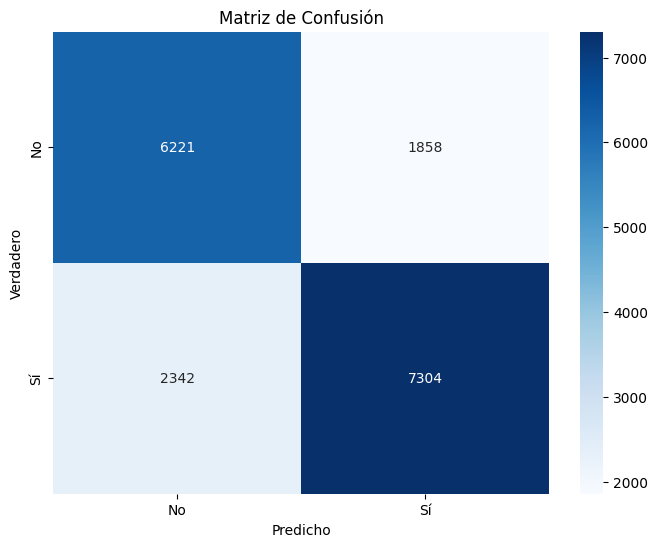

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predicts) #Calcular cada pedazo de la matriz. Calculo los costos.

# Paso 3: Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

#### El resto de las metricas dell modedlo final

In [21]:
acurracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Acurracy = {acurracy}')
precision_p = (TP) / (TP + FP)
print(f'Positive precision = {precision_p}')
precision_n = (TN) / (TN + FN)
print(f'Negative precision = {precision_n}')
TPR = (TP) / (TP + FN)
TNR = (TN) / (TN + FP)
FPR = (FP) / (TN + FP)
FNR = (FN) / (TP + FN)
print(f'True positive rate = {TPR}')
print(f'True negative rate = {TNR}')
print(f'False positive rate = {FPR}')
print(f'False negative rate = {FNR}')
print(f'AUC: {test_auc}')

Acurracy = 0.763046544428773
Positive precision = 0.7972058502510369
Negative precision = 0.7264977227607147
True positive rate = 0.7572050590918515
True negative rate = 0.7700210422081941
False positive rate = 0.2299789577918059
False negative rate = 0.24279494090814846
AUC: 0.8414837718009949
